## The official model


### Clone


In [ ]:
!git clone https://github.com/ljsabc/MangaLineExtraction_PyTorch

### Import model


In [2]:
from PIL import Image
import torch
import numpy as np

from MangaLineExtraction_PyTorch.model_torch import res_skip
from mle.image_processing_mle import MLEImageProcessor

In [3]:
model = res_skip()
model.load_state_dict(torch.load("./models/erika.pth"))

<All keys matched successfully>

In [4]:
proccesor = MLEImageProcessor()

In [5]:
model

res_skip(
  (block0): _residual_block(
    (model): Sequential(
      (0): basic_block(
        (conv1): _bn_relu_conv(
          (model): Sequential(
            (0): BatchNorm2d(1, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Conv2d(1, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          )
        )
        (residual): _bn_relu_conv(
          (model): Sequential(
            (0): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          )
        )
        (shortcut): _shortcut(
          (model): Sequential(
            (0): Conv2d(1, 24, kernel_size=(1, 1), stride=(1, 1))
          )
        )
      )
      (1): basic_block(
        (conv1): _bn_relu_conv(
          (model): Sequential(
            (0): BatchNorm2d(24, eps=0.001

### Random tensor


In [6]:
inputs = torch.rand([1, 1, 256, 256])
inputs.shape

torch.Size([1, 1, 256, 256])

In [7]:
with torch.no_grad():
    output = model(inputs)

output

tensor([[[[254.9874, 255.6178, 256.2879,  ..., 253.9339, 255.1076, 252.4654],
          [255.5883, 254.6994, 254.4175,  ..., 257.2148, 250.9933, 257.3534],
          [256.5500, 256.1937, 255.9669,  ..., 262.5041, 257.0388, 256.7886],
          ...,
          [253.9527, 256.4861, 256.0280,  ..., 238.7133, 255.2885, 257.5201],
          [254.4660, 255.5464, 257.5475,  ..., 248.6327, 257.7324, 256.5775],
          [250.5670, 253.9910, 254.3338,  ..., 246.1147, 253.0025, 240.5566]]]])

### Process an image


In [8]:
image = Image.open("./sample.jpg")

In [9]:
inputs = proccesor(image, return_tensors="pt")

In [10]:
with torch.no_grad():
    output = model(inputs.pixel_values)

output

tensor([[[[253.8114, 254.3592, 254.2685,  ..., 254.5484, 253.8479, 250.9097],
          [254.5074, 253.9166, 254.6335,  ..., 254.7308, 254.0212, 254.2112],
          [254.6444, 254.7206, 254.2278,  ..., 254.0916, 254.3579, 254.8972],
          ...,
          [254.5316, 254.3407, 254.3504,  ..., 252.5873, 253.3871, 255.0004],
          [253.9372, 253.4405, 254.2989,  ..., 253.7875, 254.2746, 254.9631],
          [250.6995, 253.9902, 254.4561,  ..., 254.9450, 254.5568, 253.1660]]]])

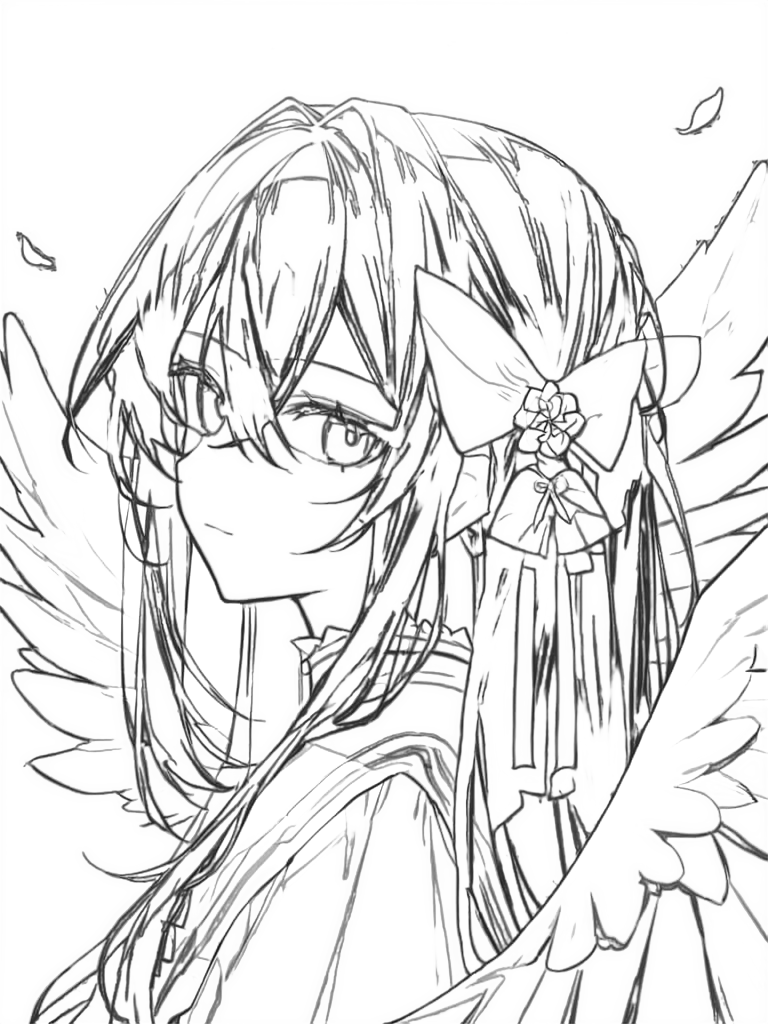

In [12]:
Image.fromarray(np.clip(output[0, 0].numpy(), 0, 255).astype("uint8"), mode="L")